In [72]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import os

In [73]:
# Observatory layout
det_s_x = 1 # m. Detector size in x axis
det_s_y = 1 # m. Detector size in y axis

In [74]:
#Path of the file with the data of particles
os.chdir('/Users/JAG/progs/buap/oliver_clusters')

In [94]:
# Run summary
Run = {'SCod': 'Corsika-77500','Mass':[1],'Lab': ['BUAP'], 'NShows':[10000], 'EInf': [1.E1] , 'ESup': [1E2], 'AAInf':[0], 'AASup':[25]} 
Run = pd.DataFrame(Run)

In [76]:
#File with summary of Showers
Showers = pd.read_csv(r'DAT000002_showers.txt', delimiter='\t')
Showers = Showers.rename(columns={'N. Shower': 'NShow', 'Energy (GeV)': 'Energy', \
                                    'Zfirst (km)' : 'ZFInt','Theta (°)': 'ZhAng', \
                                    'Phi (º)': 'AzAng', 'Phi (°)': 'AzAng',\
                                     'N. Particles' : 'NParticles'})
Showers['Mass'] = 1

In [95]:
Showers.head()

,NShow,Energy,ZFInt,ZhAng,AzAng,NParticles,Mass
0,1,1487.37,14.7681,5.7478,-147.3380,445,1
1,2,1045.30,17.4556,17.6959,-53.8310,69,1
2,3,1276.75,23.3396,10.9722,45.9374,40,1
3,4,1080.92,17.2345,23.3958,28.3721,49,1
4,5,1052.74,14.8684,22.4854,24.0341,19,1


In [78]:
#Statistics of the data frame with summary of showers 
#Showers.describe()
Showers.head

<bound method NDFrame.head of       NShow   Energy    ZFInt     ZhAng     AzAng  NParticles  Mass
0         1  1487.37  14.7681   5.74780 -147.3380         445     1
1         2  1045.30  17.4556  17.69590  -53.8310          69     1
2         3  1276.75  23.3396  10.97220   45.9374          40     1
3         4  1080.92  17.2345  23.39580   28.3721          49     1
4         5  1052.74  14.8684  22.48540   24.0341          19     1
...     ...      ...      ...       ...       ...         ...   ...
9995   9996  1151.16  17.1263  14.70820  -90.9610          54     1
9996   9997  1456.51  28.7095  22.81140  135.9480          55     1
9997   9998  1372.96  16.0131  21.17240  -14.5569          35     1
9998   9999  1133.97  21.2948   7.02651  -53.4545          44     1
9999  10000  1195.33  15.1666  23.72390  -45.3313          94     1

[10000 rows x 7 columns]>

In [79]:
#File with information of all particles at observation level
Particles = pd.read_csv('DAT000002_particles.txt',delimiter='\t')

In [80]:
Particles = Particles.rename(columns={'N. sh': 'NShow', 'P. id': 'PId',\
                                      'x (m)': 'X','y (m)': 'Y','t (ns)': 'T',\
                                     'px (GeV/c)':'Px','py (GeV/c)':'Py','pz (GeV/c)':'Pz',\
                                     'Psq (GeV)':'PSq','ek (GeV)':'Ene','zha (°)':'ZhA',\
                                     'aza (°)':'AzA'})
Particles['R'] = np.sqrt(Particles['X']**2 + Particles['Y']**2)

In [81]:
Particles.head()

,NShow,PId,X,Y,T,Px,Py,Pz,PSq,Ene,ZhA,AzA,R
0,1,6,579.567,840.394,42628.5,0.044052,0.129133,0.603674,0.383038,0.522196,12.73580,71.1636,1020.862372
1,1,1,1109.610,2555.720,44459.7,0.011192,0.030702,0.063479,0.005097,0.071396,27.23870,69.9719,2786.205138
2,1,1,-757.152,108.528,43766.5,-0.046426,-0.111219,0.038735,0.016026,0.126592,72.18270,-112.6570,764.890501
3,1,8,-753.242,152.978,43706.0,-0.253098,0.284034,0.293966,0.231150,0.361060,52.30660,131.7040,768.619398
4,1,13,-744.962,141.854,43685.1,-0.239903,0.010048,1.642670,2.756030,0.968003,8.31615,177.6020,758.347505


In [83]:
# Define local particles codes for labeling clusters
# Particle Corsika PID       P. Code
# Gamma        1              1
# Electrons    2,3            1000
# Muons        5,6            100000
# Pions        8,9            50000000
# Protons      14             10000000
# Neutrons     13             100000000
nop   = -999.
gam   = 1.
ele   = 1000.
mu    = 100000.
pi    = 50000000.
prn   = 10000000.
ntn   = 100000000. 

pmap   = {1.:gam,2.:ele,3.:ele,5.:mu,6.:mu,8.:pi, 9.:pi, 13.:ntn, 14.:prn}
#pmap   = {'1.':'gam','2.':'ele','3.':'ele','5.':'mu','6.':'mu','8.':'pi','9.':'pi', '13.':'ntn', '14.':'prn'}
#pid    = [1., 2., 3., 5., 6., 8., 9., 13., 14.]
#zipped = list(zip(pid,pcode))
#pcode  = pd.DataFrame(zipped, columns=['pid', 'pcode'])
Particles['PCode'] = Particles['PId'].map(pmap)

In [85]:
Particles.loc[0]

NShow         1.000000
PId           6.000000
X           579.567000
Y           840.394000
T         42628.500000
Px            0.044052
Py            0.129133
Pz            0.603674
PSq           0.383038
Ene           0.522196
ZhA          12.735800
AzA          71.163600
R          1020.862372
PCode    100000.000000
Name: 0, dtype: float64

In [53]:
# File with clusters information
#PrCR	LPCREn	HghPCR	IShow	iClust	ClsIdC	sClIdC\
#NpartC	NGamC	NEleC	NMuCl	XmClst	YmClst	RmClst	SigRCl	TmClst	dTClst	sTClst\
#FstPID	FstPCX	FstPCY	FstPCT	FstPZh	FstPAz	FstPPm	LstPID	LstPCX	LstPCY\
#LstPCT	LstPZh	LstPAz	LstPPm	EClMlt	ECltEn	ECltdT	ECltTh	ECltSz	ECltED	
#ECltEM	ECltET	EClETS	EGmMlt	EGmCEn	EGmCdT	EGmCTh	EGmCSz	EGmCED	EGmCEM	EGmCET
#EGmETS	GmCMlt	GmClEn	GmCldT	GmClTh	GmClSz	GmClED	GmClEM	GmClET	GmCETS	
#
# Cluster variables
#

#Clusters = {'Mass':Showers['Mass'], 'Lab' :Showers['Lab']} 
#Clusters = pd.DataFrame(Clusters)


In [88]:
#The values in the 'DetMdx' and 'DetMdy' columns will be replaced by the rounded values 
#of the positions of the particles, this will define the position of the cell
#
Particles['iCellx'] = np.floor(Particles['X']/det_s_x)
Particles['iCelly'] = np.floor(Particles['Y']/det_s_x)
#
Particles['DetX'] = Particles['iCellx'] * det_s_x + det_s_x/2
Particles['DetY'] = Particles['iCelly'] * det_s_y + det_s_y/2
#
Particles['PartX'] = 1000 * (Particles['X'] - Particles['DetX']) # mm
Particles['PartY'] = 1000 * (Particles['Y'] - Particles['DetY']) # mm
#Add a new column which will contain the number of cluster 
Particles['Ncluster'] = 0

In [89]:
Particles.loc[58]

NShow           1.000000
PId             1.000000
X            -167.174000
Y            -161.450000
T           42577.800000
Px             -0.012157
Py             -0.008400
Pz              0.078328
PSq             0.006354
Ene             0.079710
ZhA            10.683400
AzA          -145.357000
R             232.407506
PCode           1.000000
iCellx       -168.000000
iCelly       -162.000000
DetX         -167.500000
DetY         -161.500000
PartX         326.000000
PartY          50.000000
Ncluster        0.000000
Name: 58, dtype: float64

In [58]:
#ShowerN = Particles[Particles['NShow']==17]

In [90]:
#ShowerN

In [91]:
def Clusters(iclust, PartS):
    # Find clusters of particles in a shower
    # iclust: number of cluster
    # Shower: number of shower
    #
    XPos = PartS['DetX'].tolist()
    YPos = PartS['DetY'].tolist()
    
    unique_pairs = set()      # Create an empty set
    
    for xi, yi in zip(XPos, YPos):      # Iterate over the pairs of x and y using zip
        pair = (xi, yi)

        #ClCod = 0
        #PCode  = PartS['PCode']
        # Check if the pair is already in the set
        if pair not in unique_pairs:
            # If not, add it to the set
            unique_pairs.add(pair)
            #ClCod = ClCod + PCode

            # Extract the particles index by comparing it with the x, y position in the data frame
            p_index_clust = Shower.index[ (Shower['DetX'] == xi) & (Shower['DetY'] == yi) ].tolist()
            
            # Replacte the cluster position of the particle for the cluster id
            for j in range(len(p_index_clust)):
                Shower.at[p_index_clust[j],'Ncluster'] = iclust

            iclust = iclust+1 # Next Cluster
    
    return Shower, iclust 

In [93]:
%%time
iclust = 1 # Cluster counter
# Run over all the showers
nsh = Showers['NShow'].count()
#nsh = 100
for ishow in range(1, nsh + 1):   # Loop on all showers
    Shower = Particles[Particles['NShow']==ishow]   # present Shower
    shown, iclt = Clusters(iclust, Shower) 
    Particles.loc[Particles['NShow']==ishw, :] = shown

CPU times: user 2.7 s, sys: 40.8 ms, total: 2.74 s
Wall time: 2.8 s


In [64]:
# Check if there are particles that are not counted
Particles[Particles["Ncluster"]==0]

,NShow,PId,X,Y,T,Px,Py,Pz,PSq,Ene,...,AzA,R,PCode,iCellx,iCelly,DetX,DetY,PartX,PartY,Ncluster
445,2.0,6.0,316.292,409.0620,53649.0,2.110860,-2.345350,10.073700,111.435000,10.451200,...,-48.0122,517.080602,100000.0,316.0,409.0,316.5,409.5,-208.0,-438.0,0.0
446,2.0,1.0,656.405,2016.2800,53359.0,0.032563,0.006230,0.110348,0.013276,0.115221,...,10.8318,2120.436880,1.0,656.0,2016.0,656.5,2016.5,-95.0,-220.0,0.0
447,2.0,6.0,330.928,-119.5150,54083.9,1.275880,-1.624490,5.838350,38.353100,6.088230,...,-51.8538,351.848229,100000.0,330.0,-120.0,330.5,-119.5,428.0,-15.0,0.0
448,2.0,1.0,-779.558,532.5950,53190.1,-0.001382,-0.010183,0.069471,0.004932,0.070227,...,-97.7290,944.122931,1.0,-780.0,532.0,-779.5,532.5,-58.0,95.0,0.0
449,2.0,1.0,-849.334,237.3710,53375.2,-0.000489,-0.012850,0.049069,0.002573,0.050726,...,-92.1801,881.880511,1.0,-850.0,237.0,-849.5,237.5,166.0,-129.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883076,10000.0,5.0,182.625,-287.1770,48075.0,1.484340,-1.488690,4.553240,25.151500,4.910580,...,-45.0838,340.327078,100000.0,182.0,-288.0,182.5,-287.5,125.0,323.0,0.0
883077,10000.0,5.0,-254.499,93.6414,47289.1,2.784410,-2.993530,9.672880,110.279000,10.396200,...,-47.0728,271.179743,100000.0,-255.0,93.0,-254.5,93.5,1.0,141.4,0.0
883078,10000.0,5.0,530.223,-243.6050,48378.6,2.709900,-2.515720,7.572280,71.011800,8.321850,...,-42.8718,583.506492,100000.0,530.0,-244.0,530.5,-243.5,-277.0,-105.0,0.0
883079,10000.0,6.0,-326.829,920.1220,46526.7,2.017960,-1.654290,7.018600,56.069600,7.383050,...,-39.3444,976.443388,100000.0,-327.0,920.0,-326.5,920.5,-329.0,-378.0,0.0


In [ ]:
# Particles.loc[3]

In [ ]:
# Number of the cluster with the maximum number of particles
df_sn = Particles[Particles["Ncluster"]!=0]
print(df_sn["Ncluster"].value_counts().idxmax())

In [ ]:
# Summary of the cluster with the maximum number of particles
Particles[Particles["Ncluster"]==165160].describe()

In [ ]:
Particles[Particles["Ncluster"]==165160]

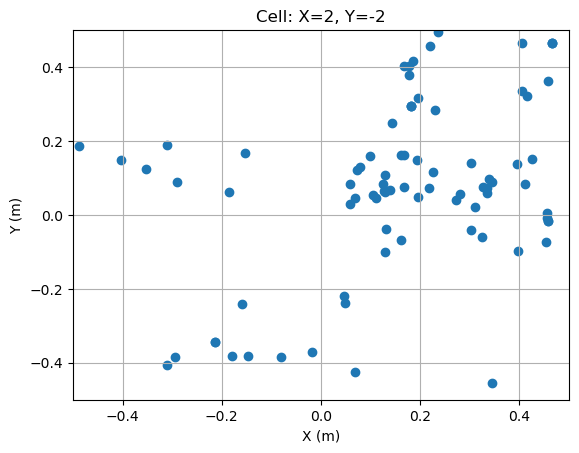

In [29]:
#Plot the cell with the maximum number of particles
cx = Particles.loc[Particles["Ncluster"]==165160,'DetPosx'].iloc[0]
cy = Particles.loc[Particles["Ncluster"]==165160,'DetPosy'].iloc[0]
Mx = Particles.loc[Particles["Ncluster"]==165160,'CoorDetx']
My = Particles.loc[Particles["Ncluster"]==165160,'CoorDety']
plt.scatter(Mx,My)
plt.title('Cell: X=%i, Y=%i'%(cx,cy))
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
#Cell for detector of 1 m^2
plt.axis([-0.5,0.5,-0.5,0.5])
#Cell for detector of 0.30 x 0.30 m^2
#plt.axis([-0.15,0.15,-0.15,0.15])
plt.grid(True)